In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from datetime import datetime

In [7]:
from util import get_transformed_data, forward, error_rate, cost, gradW, gradb, y2indicator

Reading in and transforming data...


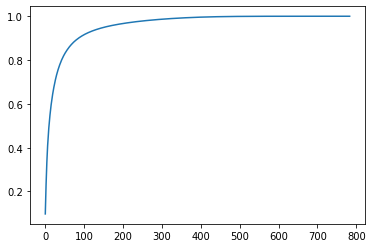

In [8]:
epoch = 50
lr = 0.0001
reg = 0.01

Xtrain, Xtest, Ytrain, Ytest = get_transformed_data()

N, D = Xtrain.shape
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)

## Full Gradient Descent

In [9]:
def full_gradient_descent():
    W = np.random.randn(D, 10) / 28 # Square root of no. of dimentionality. i.e. 28 * 28 = 784
    b = np.zeros(10)
    loss_batch = []
    t0 = datetime.now()

    for i in range(epoch):
        p_y = forward(Xtrain, W, b)

        W += lr * (gradW(Ytrain_ind, p_y, Xtrain) - reg * W)
        b += lr * (gradb(Ytrain_ind, p_y) - reg * b)

        p_y_test = forward(Xtest, W, b)
        temp_loss = cost(p_y_test, Ytest_ind)
        loss_batch.append(temp_loss)

        if i % 1 == 0:
            err = error_rate(p_y_test, Ytest)
            if i % 10 == 0:
                print("Cost at iteration %d: %.6f" % (i, temp_loss))
                print("Error rate:", err)

    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for full GD:", datetime.now() - t0)
    print("=======================================================")
    return loss_batch

## Stochastic Gradient Descent

In [11]:
def stochastic_gradient_descent():
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    loss_stochastic = []
    t0 = datetime.now()

    for i in range(epoch): # takes very long since we're computing cost for 41k samples
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)

        #for n in range(min(N, 500)): # shortcut so it won't take so long...
        for n in range(N):
            x = tmpX[n,:].reshape(1,D)
            y = tmpY[n,:].reshape(1,10)
            p_y = forward(x, W, b)

            W += lr * (gradW(y, p_y, x) - reg * W)
            b += lr * (gradb(y, p_y) - reg  * b)

            p_y_test = forward(Xtest, W, b)
            loss = cost(p_y_test, Ytest_ind)
            loss_stochastic.append(loss)

        if i % 1 == 0:
            err = error_rate(p_y_test, Ytest)
            if i % 10 == 0:
                print("Cost at iteration %d: %.6f" % (i, loss))
                print("Error rate:", err)

    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for SGD:", datetime.now() - t0)
    print("=======================================================")
    return loss_stochastic

## Mini-batch Gradient Descent

In [12]:
def mini_batch_gradient_descent():
    W = np.random.randn(D, 10) / 28
    b = np.zeros(10)
    loss_mini_batch = []
    batch_sz = 500
    n_batches = N // batch_sz

    t0 = datetime.now()

    for i in range(epoch):
        tmpX, tmpY = shuffle(Xtrain, Ytrain_ind)

        for j in range(n_batches):
            x = tmpX[j*batch_sz:(j*batch_sz + batch_sz),:]
            y = tmpY[j*batch_sz:(j*batch_sz + batch_sz),:]
            p_y = forward(x, W, b)

            W += lr*(gradW(y, p_y, x) - reg*W)
            b += lr*(gradb(y, p_y) - reg*b)

            p_y_test = forward(Xtest, W, b)
            temp_loss = cost(p_y_test, Ytest_ind)
            loss_mini_batch.append(temp_loss)

        if i % 1 == 0:
            err = error_rate(p_y_test, Ytest)
            if i % 10 == 0:
                print("Cost at iteration %d: %.6f" % (i, temp_loss))
                print("Error rate:", err)

    p_y = forward(Xtest, W, b)
    print("Final error rate:", error_rate(p_y, Ytest))
    print("Elapsted time for mini-batch GD:", datetime.now() - t0)
    print("=======================================================")
    return loss_mini_batch

## Gradient Descent algorithms comparison

In [14]:
def GD_comparison():
    loss_batch = full_gradient_descent()
    loss_stochastic = stochastic_gradient_descent()
    loss_mini_batch = mini_batch_gradient_descent()
    
    x1 = np.linspace(0, 1, len(loss_batch))
    plt.plot(x1, loss_batch, label="full(batch) GD")
    x2 = np.linspace(0, 1, len(loss_stochastic))
    plt.plot(x2, loss_stochastic, label="stochastic GD")
    x3 = np.linspace(0, 1, len(loss_mini_batch))
    plt.plot(x3, loss_mini_batch, label="mini-batch GD")
    plt.legend()
    plt.show()

Cost at iteration 0: 900.249657
Error rate: 0.181
Cost at iteration 10: 391.727946
Error rate: 0.108
Cost at iteration 20: 350.390088
Error rate: 0.1
Cost at iteration 30: 334.176800
Error rate: 0.096
Cost at iteration 40: 325.901246
Error rate: 0.095
Final error rate: 0.094
Elapsted time for full GD: 0:00:04.797489
Cost at iteration 0: 1134.533303
Error rate: 0.219
Cost at iteration 10: 456.274981
Error rate: 0.114
Cost at iteration 20: 427.582849
Error rate: 0.106
Cost at iteration 30: 421.078571
Error rate: 0.105
Cost at iteration 40: 418.905586
Error rate: 0.104
Final error rate: 0.105
Elapsted time for SGD: 0:13:25.999168
Cost at iteration 0: 1099.123362
Error rate: 0.198
Cost at iteration 10: 399.824635
Error rate: 0.106
Cost at iteration 20: 353.029791
Error rate: 0.101
Cost at iteration 30: 335.367903
Error rate: 0.098
Cost at iteration 40: 326.521948
Error rate: 0.093
Final error rate: 0.093
Elapsted time for mini-batch GD: 0:00:06.476387


/home/nitin/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


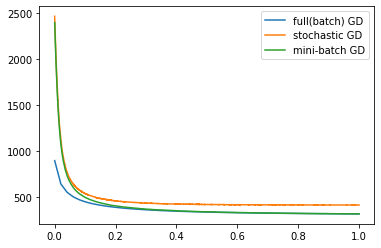

In [15]:
if __name__ == '__main__':
    GD_comparison()